In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Umesh Gupta\\Downloads\\abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


 ## checking 0 values

In [3]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [4]:
df["Height"]=df["Height"].replace(0,df["Height"].mean())

## filling 0 value by mean

In [5]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139583,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041715,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


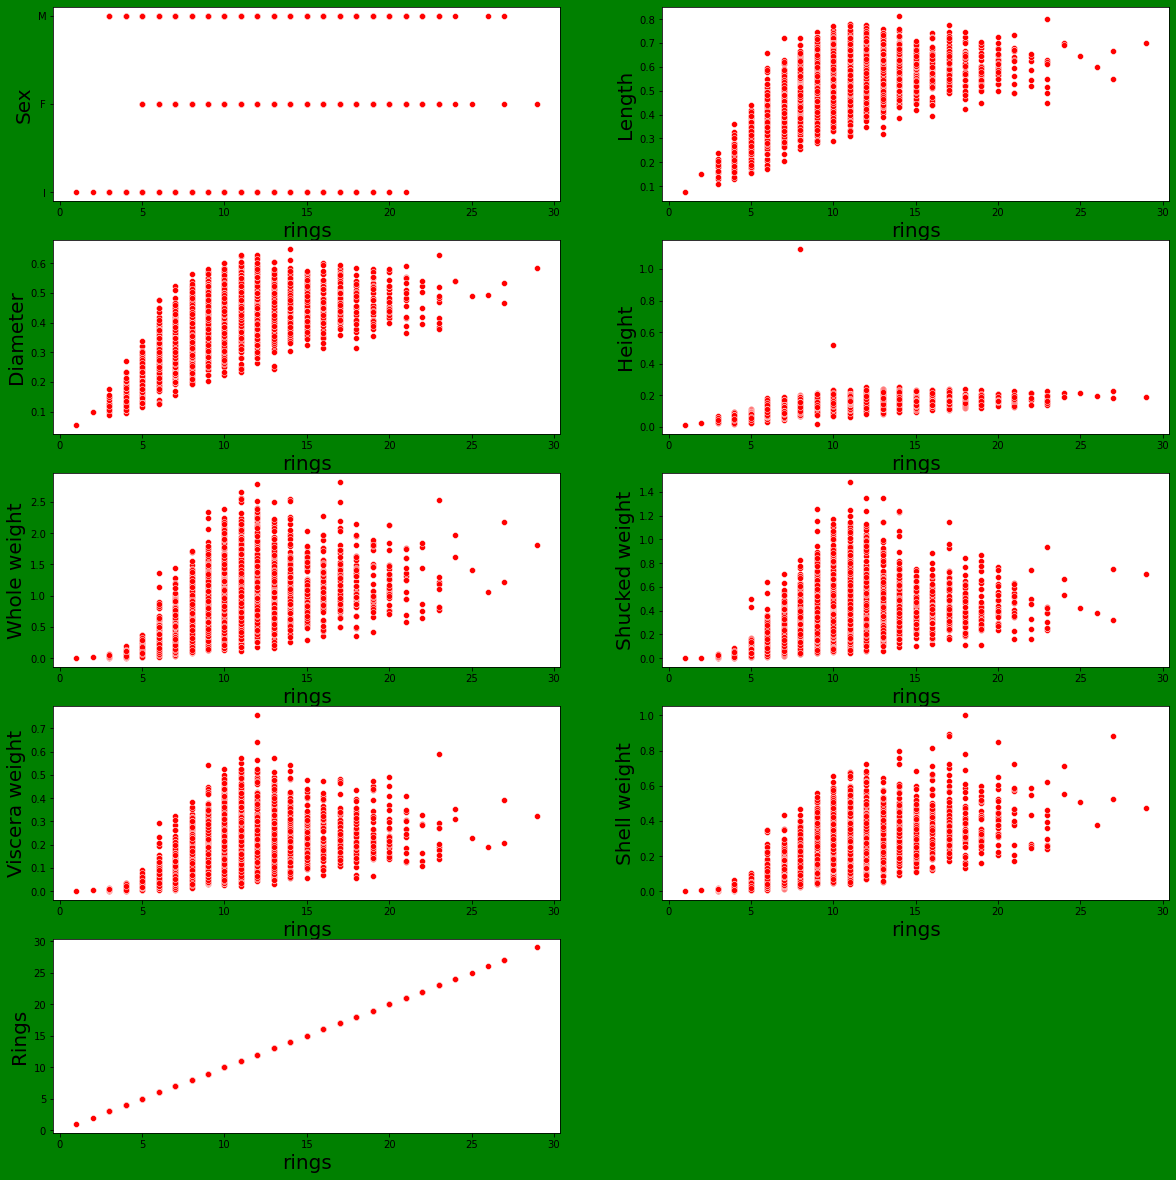

In [7]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.scatterplot(x=df["Rings"],y=df[column],color="red")
        plt.ylabel(column,fontsize=20)
        plt.xlabel("rings",fontsize=20)
    plotnumber+=1
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

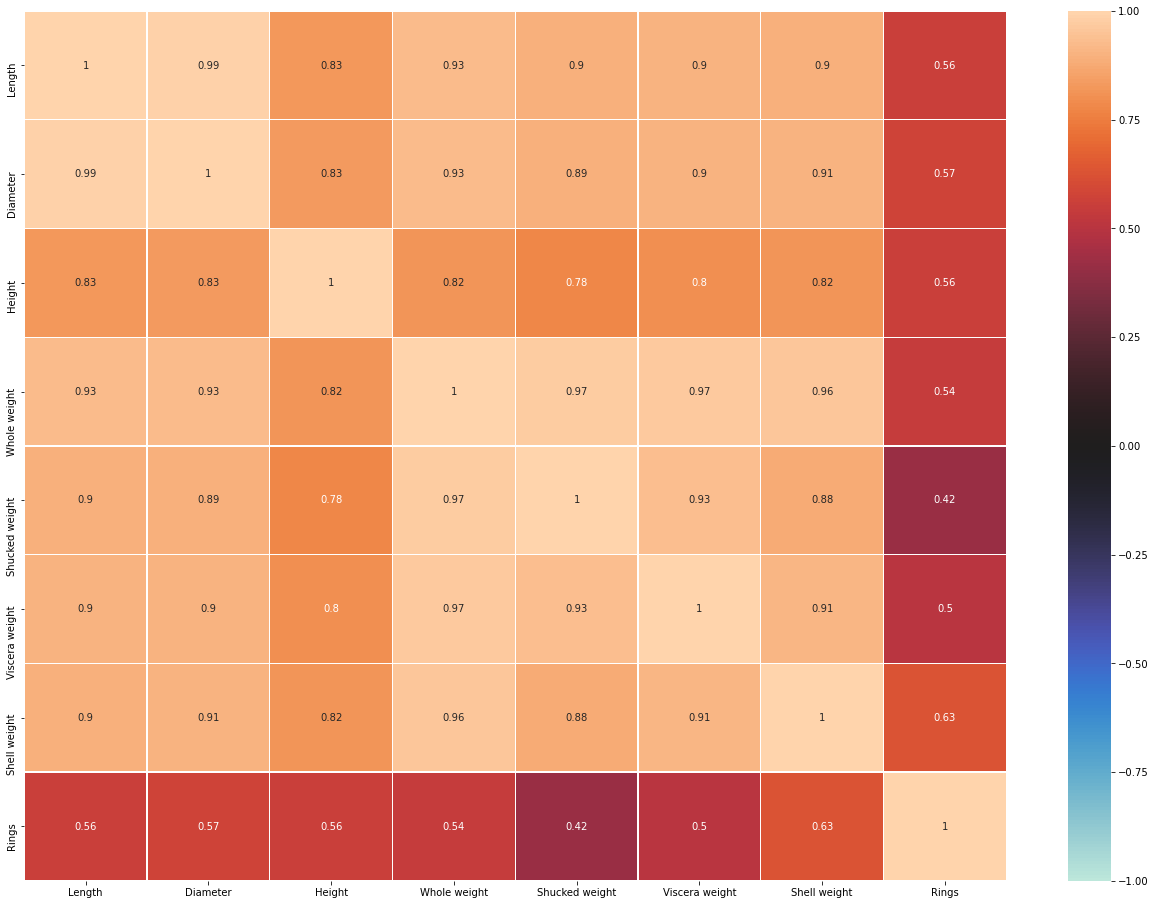

In [8]:
df_corr=df.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt=".2g",linewidths=.2)
plt.show

In [9]:
df.drop("Sex",inplace=True,axis=1)

## droping sex column

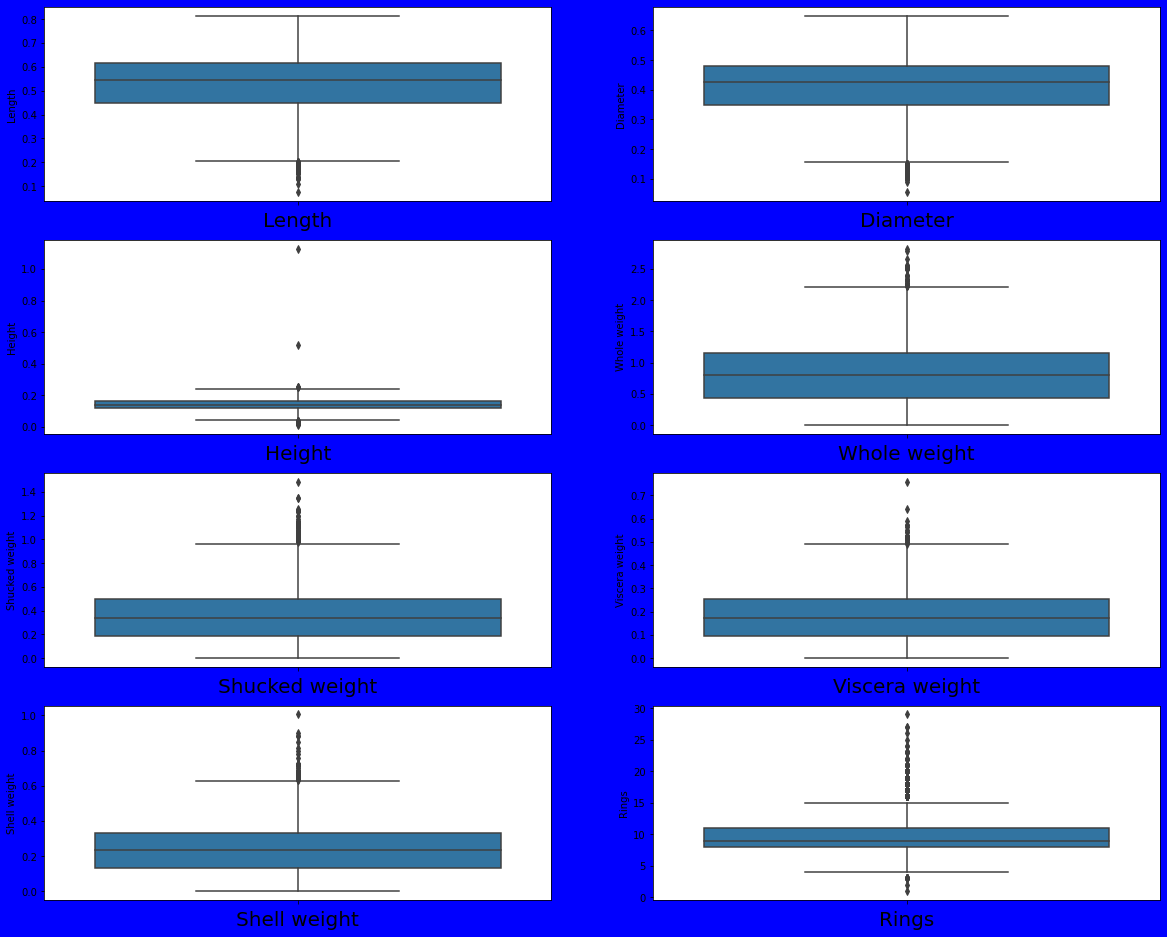

In [10]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## checking outliers

In [11]:
features=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight"]

In [12]:
from scipy.stats import zscore

In [13]:
zscr=zscore(df[features])
abs_score=np.abs(zscr)

In [14]:
filter=(abs_score<3).all (axis=1)
df=df[filter]

In [15]:
df.shape

(4086, 8)

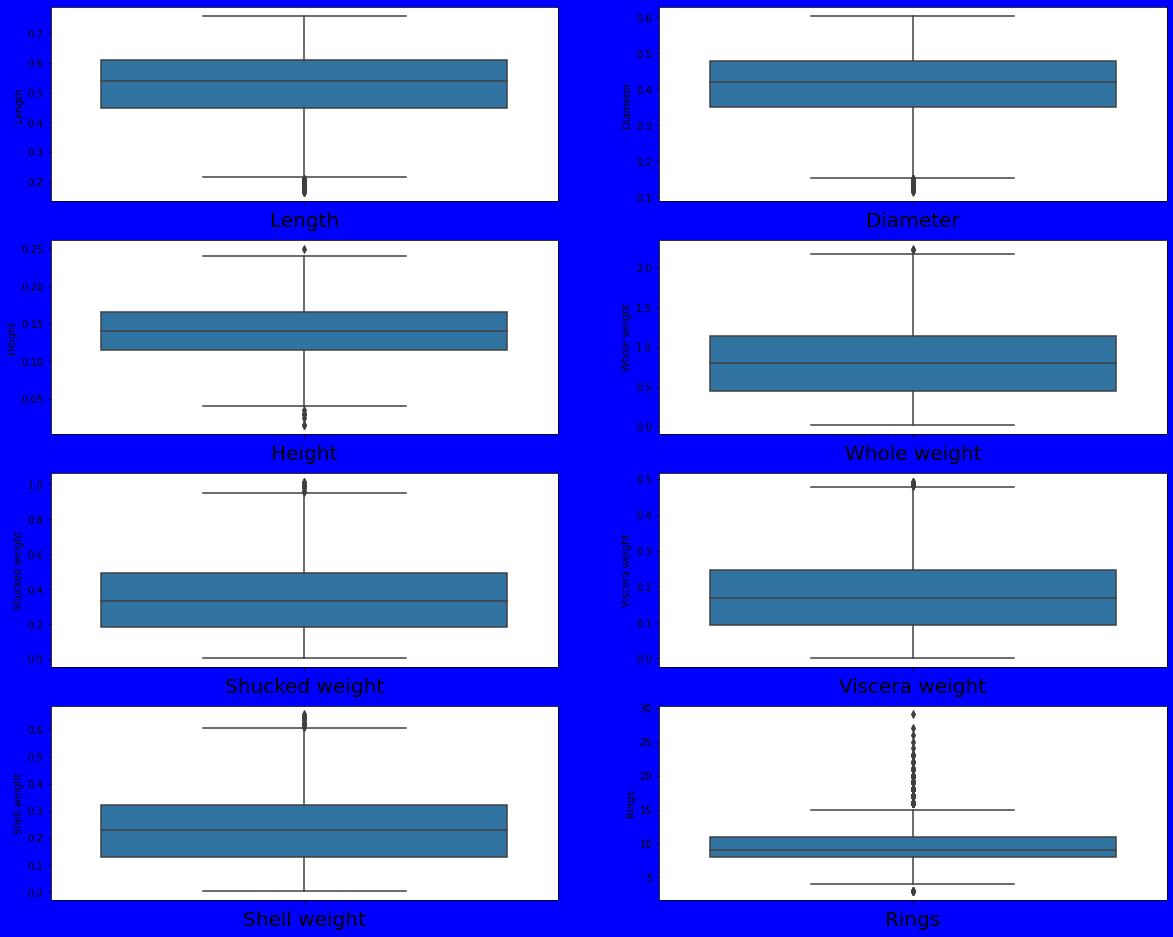

In [17]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [18]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1


In [19]:
ind=[]
for i in features:
    standard=(q1[i]-(1.5*iqr[i]))
    index=np.where(df[i]<standard)
    df.drop(df.index[index],inplace=True,axis=0)

df.shape

(4038, 8)

In [20]:
for i in features:
    standard=(q3[i]+(1.5*iqr[i]))
    index=np.where(df[i]>standard)
    df.drop(df.index[index],inplace=True,axis=0)
df.shape

(4008, 8)

In [22]:
from sklearn.preprocessing import PowerTransformer
scale=PowerTransformer(method="box-cox")



In [23]:
df[features]=scale.fit_transform(df[features].values)
df[features]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.723802,-0.571079,-1.238106,-0.572092,-0.519843,-0.668123,-0.577399
1,-1.505943,-1.494438,-1.370048,-1.420852,-1.367607,-1.400401,-1.399884
2,-0.050195,0.038429,-0.140734,-0.177406,-0.340315,-0.214547,-0.070361
3,-0.847087,-0.571079,-0.421467,-0.566981,-0.572328,-0.515144,-0.532518
4,-1.633384,-1.573266,-1.629886,-1.493990,-1.452152,-1.556324,-1.588840
...,...,...,...,...,...,...,...
4172,0.296568,0.400437,0.723493,0.280757,0.228386,0.687846,0.229713
4173,0.556807,0.277474,-0.140734,0.442062,0.536553,0.479046,0.314718
4174,0.663822,0.717807,1.920559,0.848017,0.894199,1.075586,0.651755
4175,0.938640,0.848719,0.287443,0.694052,0.916029,0.867576,0.568586


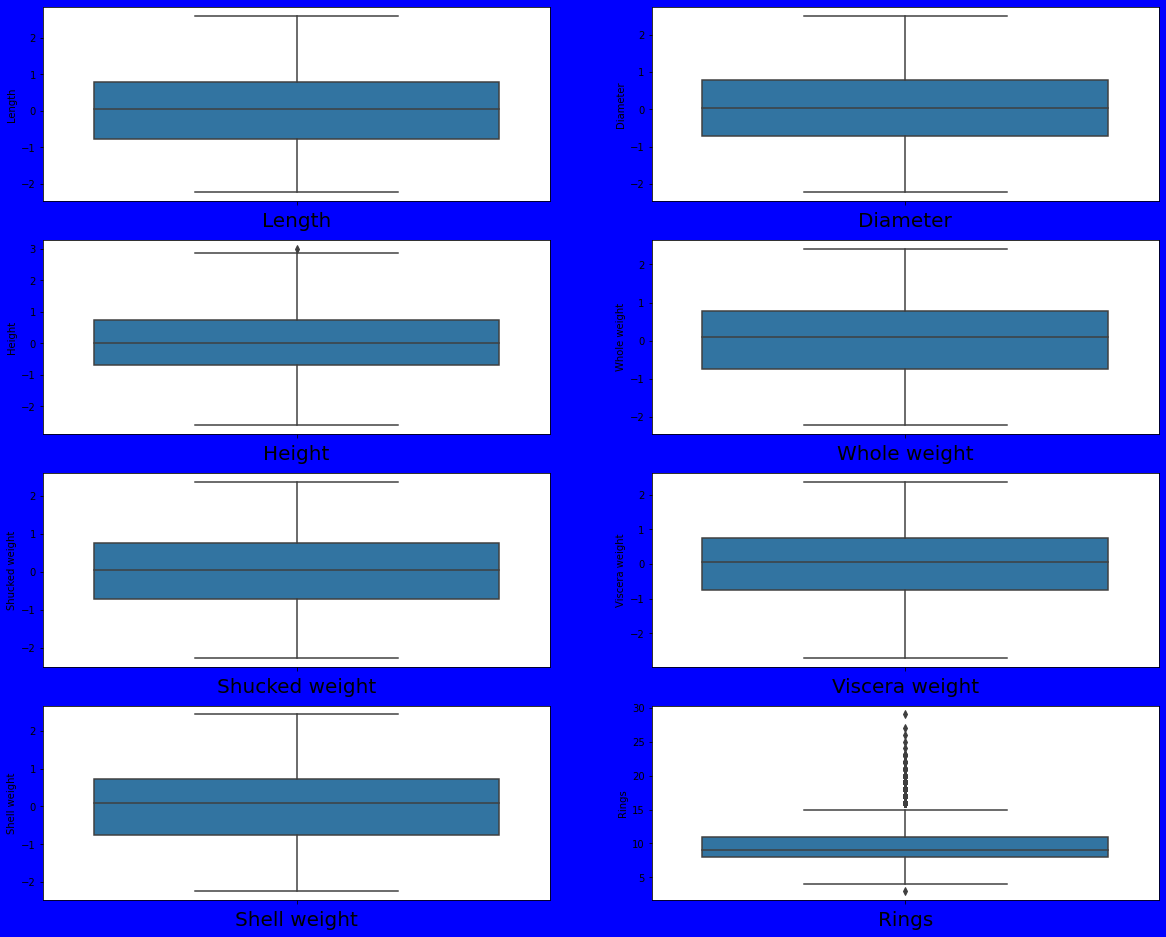

In [24]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber = 1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(y=df[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# outliers removed

In [25]:
y=df['Rings']
df=df.drop(columns='Rings')

In [26]:
df.skew()

Length           -0.131318
Diameter         -0.137397
Height           -0.066267
Whole weight     -0.136334
Shucked weight   -0.115457
Viscera weight   -0.120694
Shell weight     -0.122614
dtype: float64

In [27]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [28]:
scale=StandardScaler()
x_scaled=scale.fit_transform(df)


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

# linear regression

In [30]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [31]:
linear.score(x_train,y_train)

0.5110609640928168

In [32]:
y_pred=linear.predict(x_test)

In [33]:
r2_score(y_test,y_pred)

0.5174124987423603

In [34]:
cross_val_score(linear,x_scaled,y,cv=3).mean()

0.48564834703113746

# bagging classifier

In [35]:
bag_knn = BaggingRegressor()

In [36]:
r2_score(y_test,y_pred)

0.5174124987423603

In [37]:
cross_val_score(bag_knn,x_scaled,y,cv=3).mean()

0.42563333076325555

# svr

In [38]:
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [39]:
svr.score(x_train,y_train)

0.517238017149454

In [40]:
y_pred=svr.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.5053351311879759

In [42]:
cross_val_score(svr,x_scaled,y,cv=3).mean()

0.4981327004028923

# gbdt

In [40]:
gd = GradientBoostingRegressor()
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [41]:
y_pred=gd.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.5131981964120933

In [43]:
cross_val_score(gd,x_scaled,y,cv=3).mean()

0.48162676014611955

# svr is my best model

In [43]:
param_search ={"C":[1,5,10,15,20],"kernel":["linear","poly","rbf","sigmoid"],"degree":[1,2,3]}

In [44]:
grid_search =GridSearchCV(SVR(),param_grid=param_search)


In [45]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 5, 10, 15, 20], 'degree': [1, 2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [46]:
grid_search.best_params_

{'C': 15, 'degree': 1, 'kernel': 'rbf'}

In [47]:
svr = SVR(C=15,kernel="rbf",degree=1)
svr.fit(x_train,y_train)

SVR(C=15, degree=1)

In [48]:
y_pred=svr.predict(x_test)

In [49]:
r2_score(y_test,y_pred)

0.5288256451912036

In [52]:
cross_val_score(svr,x_scaled,y,cv=3).mean()

0.5241905250743762

In [53]:
import pickle
filename='abalone.pk1'
pickle.dump(svr,open(filename,'wb'))